# 敵対的生成ネットワーク

## 基本的な事柄



敵対的生成ネットワークとは英語では generative adversarial network（GAN）と言う（主に）ニューラルネットワークを用いてデータを生成する方法です．入力データを変換することもできますが，やっていることは変更したデータを「生成」することであるため「生成する方法です」と書きました．GAN は現実世界の色々なところで既に応用されている技術です．とても重要な技術なのでここで紹介します．最も基本的な GAN を紹介した後に，その GAN の問題点を解決する GAN を紹介して，最後により便利な利用が可能な GAN を紹介します．

```{note}
GAN の構造には必ずしもニューラルネットワークが含まれる必要はありません．
```

```{note}
計算終了までとても時間がかかるので全てのコードセルを最初に実行すると良いと思います．
```

### 原理と活用方法

GAN の構成要素はふたつです．生成器（generator）と識別器（discriminator）です．識別器は以下で紹介する Wasserstein GAN（WGAN）を利用する場合は critic と名前を変えます．これの和訳は多分ありません．ここではクリティックと表記します．GAN はデータを生成（その派生として変換）する人工知能を作る方法です．最終的に得たいのは性能良く育った生成器です．識別器の役割は生成器をより良く育てることです．

GAN の学習は，より良い質の偽札を作ろうとする紙幣の偽造者とその偽札を見破る警察によるイタチごっこに例えられます．GAN においては偽造者が生成器で，警察が識別器です．GAN は以下のような構造をしています．生成器にはランダムに発生させられたノイズデータが入力されます．このランダムノイズを入力にして生成器は質の良い偽札を生成しようとします．これに対して，識別器には生成器から出力された偽札データ（偽物のデータ）または，本物の札（本物のデータ）のどちらかが入力されます．このどちらかのデータを入力にして識別器は入力データが本物か偽物かの値を出力します．例えば，生成したいデータが画像である場合，生成器から出力されるものは画像で，識別器から出力されるものは `0` または `1` です．

<img src="https://github.com/yamada-kd/introduction-to-artificial-intelligence/blob/main/image/gan.svg?raw=1" width="100%" />

学習の最中に，生成器の性能と識別器の性能がどちらも良くなるようにそれらを育てます．よって生成器が良い感じに成長するとより質の高い偽札が生成されます．これに対して，識別器も偽札と本物の札を見分ける能力が高まるので，生成器は識別器に見破られないためにはさらに性能を向上させなければなりません．GAN の学習ではこのようなイタチごっこを行うことで生成器の性能を極限まで高めようとしています．

GAN の学習においては生成器と識別器のどちらもを成長させなければなりません．具体的には以下のようなふたつのパラメータ更新を別々に行います．

*   生成器を成長させる際には，ノイズを入力にして出力された偽物のデータを識別器の入力として識別器が真偽を識別した結果得られる出力に対して計算したコストから生成器のパラメータについて勾配を計算し，これを用いて生成器だけのパラメータの更新を行います．
*   識別器を成長させる際には，生成器から得られた偽物のデータか本物のデータを入力として識別器が真偽を識別した結果得られる出力に対して計算したコストから識別器のパラメータについて勾配を計算し，これを用いて識別器だけのパラメータ更新を行います．

生成器のコスト関数を $P$，識別器のコスト関数を $Q$ で表したとき，生成器を成長させるためのコストを計算するコスト関数は以下のように表されます．

$
\displaystyle P(\boldsymbol{\theta})=\frac{1}{N}\sum_{i=1}^{N}\log(1-D(\boldsymbol{\phi},G(\boldsymbol{\theta},\boldsymbol{z}_i)))
$

ここで，生成器は $G$，識別器は $D$ で表しています．それぞれのニューラルネットワークのパラメータは $\boldsymbol{\theta}$ と $\boldsymbol{\phi}$ で，また，生成器と識別器へ入力されたデータの個数（サイズ）は $N$ です．生成器への入力データである $N$ 個のノイズの $i$ 番目のデータを $\boldsymbol{z}_i$ と表し，識別器への $i$ 番目の入力データを $\boldsymbol{x}_i$ と表記しています．識別器は入力されたデータが偽である場合 `0` を出力し，真である場合 `1` を出力するものとします．この場合，生成器の出力は全て真であると識別してほしいので，この $P$ を小さくすれば目的に適うわけです．一方で，識別器のコスト関数は以下のように表されます．

$
\displaystyle Q(\boldsymbol{\phi})=-\frac{1}{N}\sum_{i=1}^{N}(\log D(\boldsymbol{\phi},\boldsymbol{x}_i)+\log(1-D(\boldsymbol{\phi},G(\boldsymbol{\theta},\boldsymbol{z}_i))))
$

本物のデータに対しては `1` を出力してほしいし，偽物のデータに対しては `0` を出力してほしいので，この $Q$ を小さくすれば良いのですね．

ここでは，このように生成器と識別器のコスト関数を分けて書きましたが，元の論文には以下のように書かれています．

$
\displaystyle \min_G \max_D V(D,G) = \min_G \max_D \mathbb E_{x \sim p_{data}(x)}[\log{D(x)}]+ \mathbb E_{z \sim p_z(z)}[\log{(1-D(G(z)))}]
$




```{note}
元論文の式，これ厳密でしょうか？これだけ見せられたら意味わからないです．
```

### 色々な GAN

GAN は色々なところで使われています．元々の GAN は 2014 年に開発されたのですが，その後もその改良は様々な研究者によって行われてきました．GAN の特有の問題を解決するための研究や GAN の適用先を画像解析分野や文字列解析分野にした研究や GAN に新たな機能を加える研究等です．数多くの GAN が開発されており，それらの GAN をまとめて GAN Zoo という場合があります．GAN Zoo は以下のウェブサイトにまとめられています．

https://github.com/hindupuravinash/the-gan-zoo

全ての GAN について説明することはできないため，ここでは，最も基本的な GAN を紹介した後に，GAN の特有の問題であるモード崩壊を抑制するために開発された方法である WGAN-gp と GAN の入力に何らかの条件を加えることで，その条件にあった出力をさせることができるようになる Conditional GAN（CGAN）の紹介を行います．


## 基本的な GAN

この節では基本的な GAN の実装方法を紹介します．また，GAN に関してどのような問題が存在しているのかについてまとめます．

### GAN の学習の手順

GAN の学習は以下のような手順で行われます．

1.   ノイズを入力にして生成器が偽物のデータを生成する．
2.   偽物のデータを識別器に入力し，識別器からの出力値を得る．
3.   識別器の出力値を用いて計算したコスト関数 $P$ の値に基づいて生成器のパラメータを更新．
4.   偽物のデータと本物のデータを識別器に入力し，識別器からの出力値を得る．
5.   識別器の出力値を用いて計算したコスト関数 $Q$ の値に基づいて識別器のパラメータを更新．
6.   識別器の評価指標が収束した場合，学習を終了．それ以外の場合，最初に戻る．

実際の学習の際には適した最適化法を選ぶとか，生成器と識別器の学習回数を変えるとか，真のラベルを 1 ではなくて 0.8 から 1.2 の範囲に含まれる値にするとかのテクニックが存在します．

### GAN の実装

最も基本的な GAN を実装します．このプログラムでは MNIST の学習データセットを読み込んで，類似した数字画像を出力する人工知能を構築します．以下のように書きます．

In [ ]:
#!/usr/bin/env python3
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
torch.manual_seed(0)
np.random.seed(0)

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # ハイパーパラメータの設定．
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 500

    # データセットの読み込み．
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # データを最小値1，最大値1に変換．
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    dataloader = DataLoader(dataset, batch_size=MiniBatchSize, shuffle=True)

    # モデルの設定．
    generator = Generator(NoiseSize).to(device)
    discriminator = Discriminator().to(device)
    optimizerGenerator = optim.Adam(generator.parameters(), lr=0.0001) # 生成器用のオプティマイザ．
    optimizerDiscriminator = optim.Adam(discriminator.parameters(), lr=0.00004) # 識別器用のオプティマイザ．
    criterion = nn.CrossEntropyLoss()

    for epoch in range(1, MaxEpoch + 1):
        generator_total_cost, discriminator_total_cost, generator_total_acc, discriminator_total_acc = 0, 0, 0, 0
        for real_images, _ in dataloader:
            real_images = real_images.flatten(start_dim=1).to(device)
            batch_size = real_images.size(0)

            # 本物のラベルを1，偽物のラベルを0に設定．
            real_labels = torch.ones(batch_size, dtype=torch.long).to(device)
            fake_labels = torch.zeros(batch_size, dtype=torch.long).to(device)

            # ノイズを生成して，そのノイズから偽画像を生成．
            noise = generate_noise(batch_size, NoiseSize).to(device)
            fake_images = generator(noise)

            # 識別器の計算．
            optimizerDiscriminator.zero_grad()
            real_predictions = discriminator(real_images)
            fake_predictions = discriminator(fake_images.detach()) # このfake_imagesは生成器から生成されたデータなので生成器のパラメータ更新に影響を与えないように計算グラフから切り離す必要がある．
            real_loss = criterion(real_predictions, real_labels)
            fake_loss = criterion(fake_predictions, fake_labels)
            discriminator_loss = real_loss + fake_loss
            discriminator_loss.backward()
            optimizerDiscriminator.step()
            # 表示用のコストと正確度の計算．
            real_acc = (real_predictions.argmax(dim=1) == real_labels).sum().item() / len(dataset)
            fake_acc = (fake_predictions.argmax(dim=1) == fake_labels).sum().item() / len(dataset)
            discriminator_total_acc += (real_acc + fake_acc) / 2
            discriminator_total_cost += discriminator_loss.item() / len(dataloader)

            # 生成器の計算．
            optimizerGenerator.zero_grad()
            fake_predictions = discriminator(fake_images)
            generator_loss = criterion(fake_predictions, real_labels) # 生成器で生成した偽画像を本物に近づけたいため．
            generator_loss.backward()
            optimizerGenerator.step()
            # 表示用のコストと正確度の計算．
            generator_acc = (fake_predictions.argmax(dim=1) == real_labels).sum().item() / len(dataset)
            generator_total_acc += generator_acc
            generator_total_cost += generator_loss.item() / len(dataloader)

        if epoch % 10 == 0:
            print(f"Epoch {epoch} D-cost: {discriminator_total_cost:.4f} D-ACC: {discriminator_total_acc:.4f} G-cost: {generator_total_cost:.4f} G-ACC: {generator_total_acc:.4f}")
            with torch.no_grad():
                generator.eval()
                validation_noise = generate_noise(1, NoiseSize).to(device)
                validation_image = generator(validation_noise).view(28, 28).cpu().numpy()
                plt.imshow(validation_image, cmap="gray")
                plt.pause(1)
                generator.train()

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        return self.model(x)

class Generator(nn.Module):
    def __init__(self, NoiseSize):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(NoiseSize, 256),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(256),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(256),
            nn.Linear(256, 784),
            nn.Tanh(), # データを最小値1，最大値1に変換したので生成するデータは最小値1，最大値1になってほしいため．
        )

    def forward(self, x):
        return self.model(x)

def generate_noise(MiniBatchSize, NoiseSize):
    return torch.rand(MiniBatchSize, NoiseSize).uniform_(-1, 1) # 最小値-1，最大値1の一様分布．

if __name__ == "__main__":
    main()

実行した結果，エポックを経るに従って数字が含まれたような画像が生成されたはずです．GAN の学習の過程では，生成器と識別器の性能は拮抗するはずなので，生成器の正確度と識別器の正確度はどちらも 0.5 に収束すると良いと考えられます．

以下の部分ではハイパーパラメータを設定します．ミニバッチに含まれるデータのサイズは 300 個にしました．GAN はランダムに発生させたノイズから何らかのデータを生成するものですが，このノイズのサイズ `NoiseSize` を 100 に設定しました．変更しても良いです．学習は今回の場合，500 回行うことにしました．実際はコストの値を観察しながら過学習が起こっていないエポックで学習を止めると良いと思います．

```python
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 500
```

データセットの読み込みの部分ですが，PyTorch が提供する MNIST は0から1の値からなるデータなので，これを-1から1の範囲からなるデータに変換しています．

```python
    # データセットの読み込み．
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # データを最小値1，最大値1に変換．
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    dataloader = DataLoader(dataset, batch_size=MiniBatchSize, shuffle=True)
```

以下の部分では生成器と識別器を生成します．最適化法は生成器と識別器で異なるものを利用した方が良い場合があります．経験的に識別器の方が性能が出やすいので，ここでは学習率を少し小さく設定しています．

```python
    # モデルの設定．
    generator = Generator(NoiseSize).to(device)
    discriminator = Discriminator().to(device)
    optimizerGenerator = optim.Adam(generator.parameters(), lr=0.0001) # 生成器用のオプティマイザ．
    optimizerDiscriminator = optim.Adam(discriminator.parameters(), lr=0.00004) # 識別器用のオプティマイザ．
    criterion = nn.CrossEntropyLoss()
```

生成器を生成するためのクラスは以下に示す通りです．入力されたノイズデータに対して 3 層の全結合層の計算がされます．各層の活性化関数は Leaky ReLU です．また，バッチノーマライゼーションも利用しています．最終層のユニットサイズは 784 ですが，これは MNIST 画像のピクセル数に相当します．

```python
class Generator(nn.Module):
    def __init__(self, NoiseSize):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(NoiseSize, 256),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(256),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(256),
            nn.Linear(256, 784),
            nn.Tanh(), # データを最小値1，最大値1に変換したので生成するデータは最小値1，最大値1になってほしいため．
        )
    
    def forward(self, x):
        return self.model(x)
```

識別器を生成するためのクラスは以下に示す通りです．今回の場合，識別器の入力データは 784 ピクセルの画像データです．これを入力にして，このデータが真か偽かを識別します．よって，最終層のユニットサイズは2です．

```python
# 入力されたデータを0か1に分類するネットワーク
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 2),
        )
    
    def forward(self, x):
        return self.model(x)
```

学習ループについて説明します．最初に，以下の記述で本物データのラベルを1に偽物データのラベルを0と決めます．また，ノイズを生成し，そのノイズを生成器の入力として偽物データを生成します．

```python
            # 本物のラベルを1，偽物のラベルを0に設定．
            real_labels = torch.ones(batch_size, dtype=torch.long).to(device)
            fake_labels = torch.zeros(batch_size, dtype=torch.long).to(device)
            
            # ノイズを生成して，そのノイズから偽画像を生成．
            noise = generate_noise(batch_size, NoiseSize).to(device)
            fake_images = generator(noise)
```
ノイズを発生させるための関数は以下の通りです．

```Python
def generate_noise(MiniBatchSize, NoiseSize):
    return torch.rand(MiniBatchSize, NoiseSize).uniform_(-1, 1) # 最小値-1，最大値1の一様分布．
```

以下の部分は識別器を成長させるための記述です．識別器に本物データと偽物データをそれぞれ入力することで予測値を出力させます．それらに対してコスト値を計算します．識別器は本物のデータが入力されたら本物と識別するように，また，偽物のデータが入力されたら偽物と識別するように成長させられます．識別器への入力値には `fake_images` という生成器からの出力値が含まれます．つまり，生成器と識別器が連結した大きなネットワークと見做すことができます．これらのパラメータの更新を一括で行ってしまうことはできますが，それはしたくありません．この記述では識別器だけを学習させたいのです．そのため，`.detach()` を利用して生成器に関わる部分の計算グラフを切り離します．そうすることで，以降の `.backward()` の計算に生成器の情報が含まれなくなります．

```Python
            # 識別器の計算．
            optimizerDiscriminator.zero_grad()
            real_predictions = discriminator(real_images)
            fake_predictions = discriminator(fake_images.detach()) # このfake_imagesは生成器から生成されたデータなので生成器のパラメータ更新に影響を与えないように計算グラフから切り離す必要がある．
            real_loss = criterion(real_predictions, real_labels)
            fake_loss = criterion(fake_predictions, fake_labels)
            discriminator_loss = real_loss + fake_loss
            discriminator_loss.backward()
            optimizerDiscriminator.step()
            # 表示用のコストと正確度の計算．
            real_acc = (real_predictions.argmax(dim=1) == real_labels).sum().item() / len(dataset)
            fake_acc = (fake_predictions.argmax(dim=1) == fake_labels).sum().item() / len(dataset)
            discriminator_total_acc += (real_acc + fake_acc) / 2
            discriminator_total_cost += discriminator_loss.item() / len(dataloader)
```

以下は生成器を成長させるための記述です．偽物データを識別器に入力して得られた出力値と本物データの差を小さくする計算を行います．つまり，生成器から出力されたデータはすべて真であると学習させるということを意味しています．

```python
            # 生成器の計算．
            optimizerGenerator.zero_grad()
            fake_predictions = discriminator(fake_images)
            generator_loss = criterion(fake_predictions, real_labels) # 生成器で生成した偽画像を本物に近づけたいため．
            generator_loss.backward()
            optimizerGenerator.step()
            # 表示用のコストと正確度の計算．
            generator_acc = (fake_predictions.argmax(dim=1) == real_labels).sum().item() / len(dataset)
            generator_total_acc += generator_acc
            generator_total_cost += generator_loss.item() / len(dataloader)
```

### GAN の問題点

上のプログラムを実行した際には観測できなかったかもしれませんが，GAN の学習を行った結果得られる人工知能（学習済み生成器）が同じような出力しかしなくなる現象があります．MNIST を例にすると1が含まれる画像しか生成しなくなるような現象です．この現象のことをモード崩壊と言います．英語では mode collpase と書きます．データを生成するために利用する GAN なので，利用目的にも依りますが，この現象は普通好ましくないものであると考えられます．これを解決しようとした WGAN-gp を以下で紹介します．

また，生成器の学習がとても進みにくいという問題もあります．最適化法を変更するとか，ハイパーパラメータの設定を慎重に行うとか，学習データサイズを増やすとかの色々な対策をとる必要があります．GAN の学習をうまく進めるために様々なテクニックがインターネット上でまとめられていますが，それらを自分の問題に合わせて取捨選択すると良いと思います．

その他の GAN の問題点としては，上のプログラムを実行した結果から確認できたと思いますが，生成したいデータの条件を指定できないことです．例えば，MNIST のような数字が含まれた画像の中でも2が含まれる画像のみを生成したい場合，上のプログラムではかなり蕪雑な方法を使わないとできません．これを解決しようとした方法 CGAN を以下で紹介します．

## WGAN-gp

基本的な GAN の改良版である WGAN-gp の実装方法を紹介します．

### WGAN-gp とは

WGAN-gp は基本的な GAN で起こりやすく問題となるモード崩壊を解決しようとした方法です．GAN では何らかの分布に従ってデータが生成していると考えますが，この分布と本物のデータが生成される分布を近づけようとします．基本的な GAN の学習で行っている行為はそのふたつの分布間のヤンセン・シャノンダイバージェンスと言う値を小さくしようとすることに相当します．これに対して WGAN-gp ではより収束性能に優れたワッサースタイン距離を小さくしようとします．詳しくは元の論文を参照してください．

WGAN-gp の学習における生成器のコスト関数は以下の式で表されます．

$
\displaystyle P(\boldsymbol{\theta})=-\frac{1}{N}\sum_{i=1}^{N}D(\boldsymbol{\phi},G(\boldsymbol{\theta},\boldsymbol{z}_i))
$

また，WGAN-gp において識別器は真か偽の二値を識別して出力するものではなくて，実数を出力するものへと変わるため，これを識別器と呼ばず，クリティックと呼ぶ場合があるため，ここでもそのように呼びます．クリティックのコスト関数は以下の式で表されます．

$
\displaystyle Q(\boldsymbol{\phi})=\frac{1}{N}\sum_{i=1}^{N}(D(\boldsymbol{\phi},G(\boldsymbol{\theta},\boldsymbol{z}_i))-D(\boldsymbol{\phi},\boldsymbol{x}_i)+\lambda(\|\boldsymbol{g}(\boldsymbol{\phi},\boldsymbol{\hat{x}}_i)\|_2-1)^2)
$

ここでも，生成器を $G$，クリティックを $D$ で表します．それぞれのニューラルネットワークのパラメータは $\boldsymbol{\theta}$ と $\boldsymbol{\phi}$ で，また，生成器とクリティックへ入力されたデータの個数を $N$ とします．生成器への入力データである $N$ 個のノイズの $i$ 番目のデータを $\boldsymbol{z}_i$ と表し，クリティックへの $i$ 番目の入力データを $\boldsymbol{x}_i$ と表します．最後に，生成器のコスト関数を $P$，クリティックのコスト関数を $Q$ で表します．このクリティックのコスト関数にあるラムダを含む項は勾配ペナルティです．英語では gradient penalty（gp）です．このラムダはハイパーパラメータであり元の論文では10に設定されています．また，$\boldsymbol{g}$ は勾配ベクトル場であり，以下のように定義されます．

$
\displaystyle \boldsymbol{g}(\boldsymbol{\phi},\boldsymbol{x})=\frac{\partial D(\boldsymbol{\phi},\boldsymbol{x})}{\partial\boldsymbol{x}}
$

また，$\boldsymbol{\hat{x}}_i$ は以下の式で計算される値です．

$
\boldsymbol{\hat{x}}_i=\epsilon\boldsymbol{x}_i+(1-\epsilon)G(\boldsymbol{\theta},\boldsymbol{z}_i)
$

式中で用いられている $\epsilon$ は，最小値が 0 で最大値が 1 の一様分布からサンプリングしたランダムな値です．

### WGAN-gp の実装

WGAN-gp を実装します．このプログラムでも MNIST の学習データセットを読み込んで，類似した数字画像を出力する人工知能を構築します．以下のように書きます．

Epoch 10, Critic Loss: -2.2575135231018066, Generator Loss: 20.32186508178711


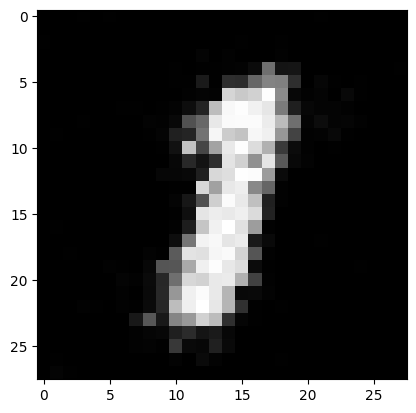

Epoch 20, Critic Loss: -0.5380182862281799, Generator Loss: 1.4139845371246338


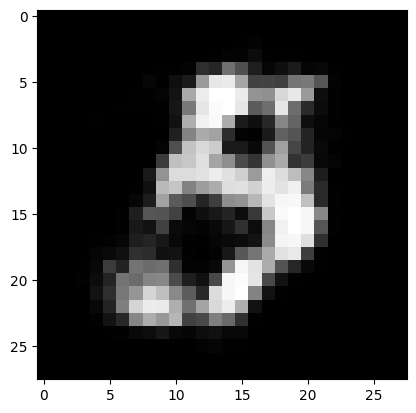

Epoch 30, Critic Loss: -0.6661345362663269, Generator Loss: -0.9224522709846497


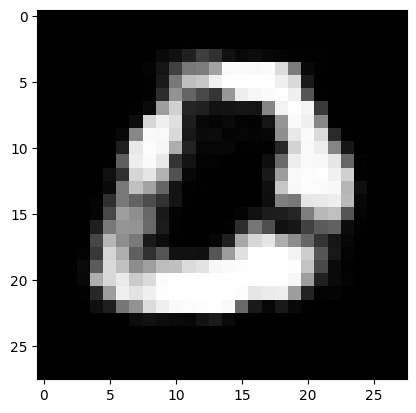

Epoch 40, Critic Loss: 0.2050597071647644, Generator Loss: -2.037776231765747


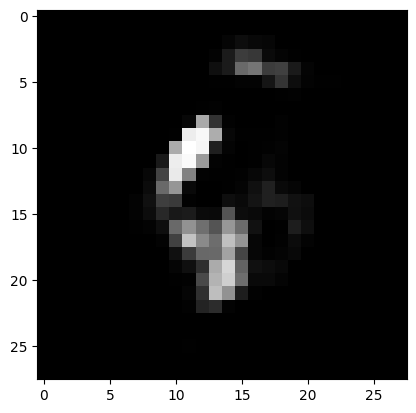

Epoch 50, Critic Loss: -0.7068277597427368, Generator Loss: -2.11684250831604


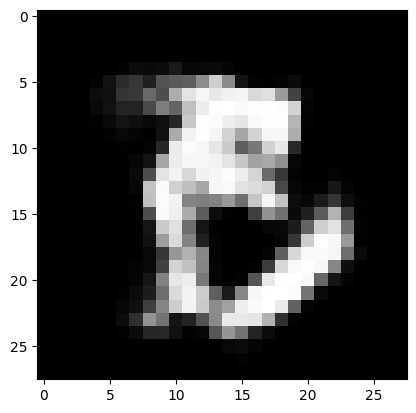

Epoch 60, Critic Loss: -0.8753162622451782, Generator Loss: -2.0120584964752197


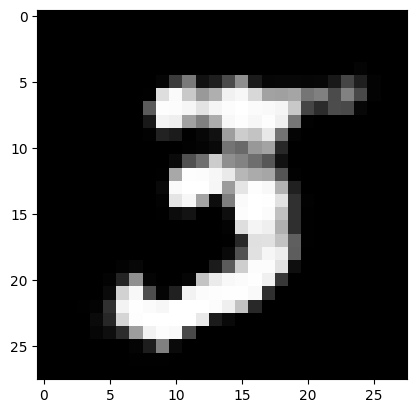

Epoch 70, Critic Loss: -0.498803973197937, Generator Loss: -1.7515109777450562


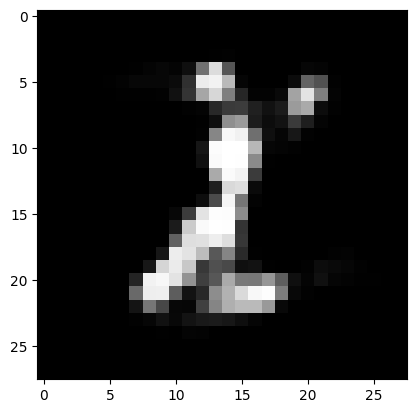

Epoch 80, Critic Loss: -0.87310791015625, Generator Loss: -0.9209244847297668


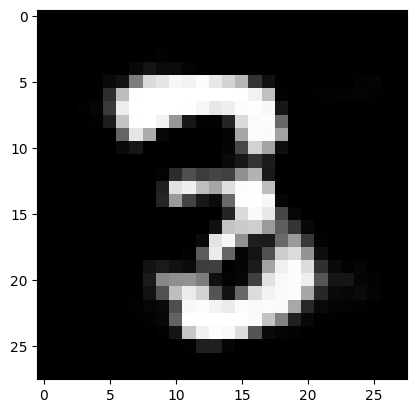

Epoch 90, Critic Loss: 0.015294969081878662, Generator Loss: -1.0653326511383057


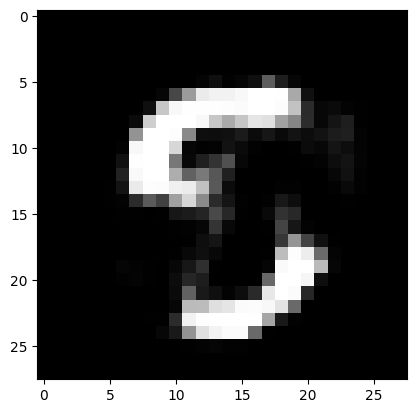

Epoch 100, Critic Loss: -0.3914181590080261, Generator Loss: -2.5836169719696045


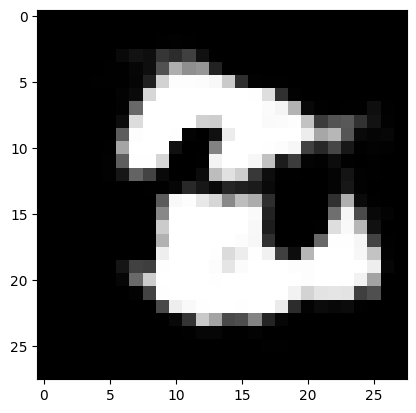

In [ ]:
#!/usr/bin/env python3
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0)
np.random.seed(0)

def calculate_gradient_penalty(critic, real_data, fake_data):
    alpha = torch.rand(real_data.size(0), 1)
    alpha = alpha.expand(real_data.size()).to(real_data.device)
    interpolated = alpha * real_data + (1 - alpha) * fake_data
    interpolated.requires_grad_(True)
    prob_interpolated = critic(interpolated)
    gradients = torch.autograd.grad(outputs=prob_interpolated, inputs=interpolated,
                                    grad_outputs=torch.ones(prob_interpolated.size()).to(real_data.device),
                                    create_graph=True, retain_graph=True)[0]
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * 10
    return gradient_penalty

def generate_noise(batch_size, noise_size):
    return torch.rand(batch_size, noise_size).uniform_(-1, 1)

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    #
    MiniBatchSize = 300
    NoiseSize = 100
    MaxEpoch = 300
    CriticLearningNumber = 5
    GradientPenaltyCoefficient = 10

    #
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    dataloader = DataLoader(dataset, batch_size=MiniBatchSize, shuffle=True)

    #
    generator = Generator().to(device)
    critic = Critic().to(device)
    optimizerGenerator = optim.Adam(generator.parameters(), lr=0.0001, betas=(0, 0.9))
    optimizerCritic = optim.Adam(critic.parameters(), lr=0.0001, betas=(0, 0.9))

    for epoch in range(1, MaxEpoch+1):
        for i, (real_images, _) in enumerate(dataloader):
            real_images = real_images.view(-1, 784).to(device)
            noise = generate_noise(MiniBatchSize, NoiseSize).to(device)
            fake_images = generator(noise)

            for _ in range(CriticLearningNumber):
                optimizerCritic.zero_grad()
                critic_real = critic(real_images).mean()
                critic_fake = critic(fake_images.detach()).mean()
                gp = calculate_gradient_penalty(critic, real_images.data, fake_images.data)
                critic_loss = critic_fake - critic_real + gp
                critic_loss.backward()
                optimizerCritic.step()

            optimizerGenerator.zero_grad()
            generator_loss = -critic(fake_images).mean()
            generator_loss.backward()
            optimizerGenerator.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Critic Loss: {critic_loss.item()}, Generator Loss: {generator_loss.item()}")
            with torch.no_grad():
                generator.eval()
                validation_noise = generate_noise(1, NoiseSize).to(device)
                validation_image = generator(validation_noise).view(28, 28).cpu().numpy()
                plt.imshow(validation_image, cmap="gray")
                plt.pause(1)
                generator.train()

class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.model(x)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(128),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(128),
            nn.Linear(128, 128),
            nn.LeakyReLU(0.3),
            nn.BatchNorm1d(128),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

if __name__ == "__main__":
    main()

11490434/11490434 [==============================] - 0s 0us/step
Epoch         10 D-cost -3.7952 G-cost -2.0991


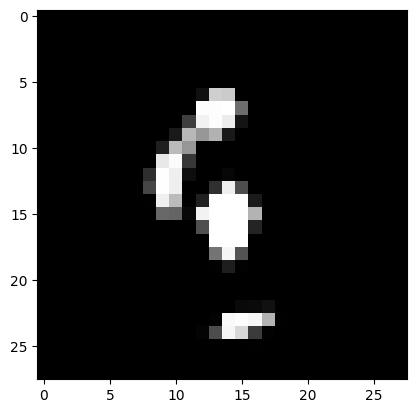

Epoch         20 D-cost -5.0577 G-cost 7.0692


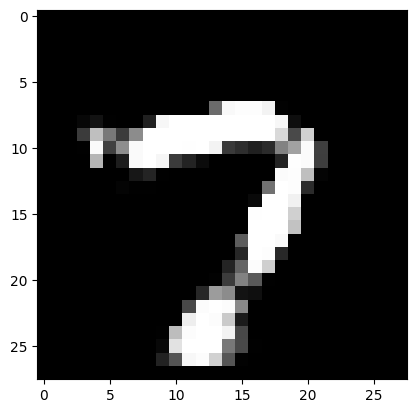

Epoch         30 D-cost -4.2893 G-cost 4.6005


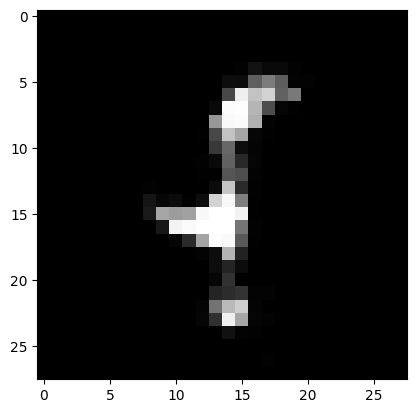

Epoch         40 D-cost -3.5278 G-cost 2.0132


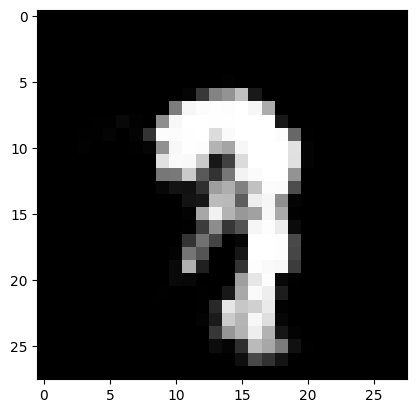

Epoch         50 D-cost -3.1768 G-cost 1.9226


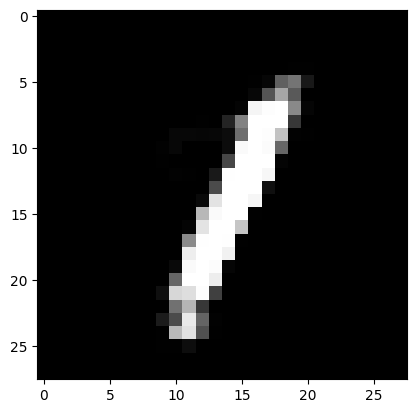

Epoch         60 D-cost -2.9886 G-cost 1.9873


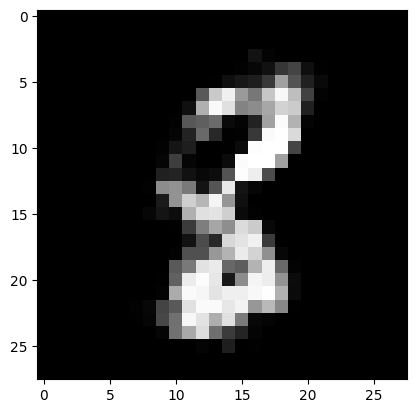

Epoch         70 D-cost -2.8164 G-cost 1.9255


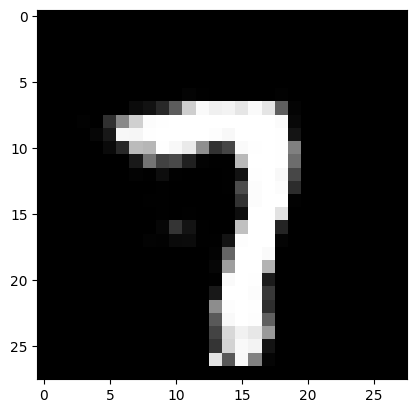

Epoch         80 D-cost -2.6701 G-cost 1.8375


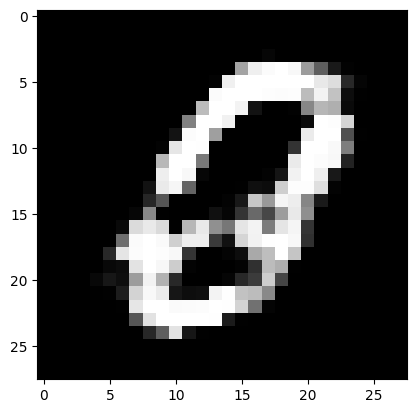

Epoch         90 D-cost -2.5358 G-cost 1.7123


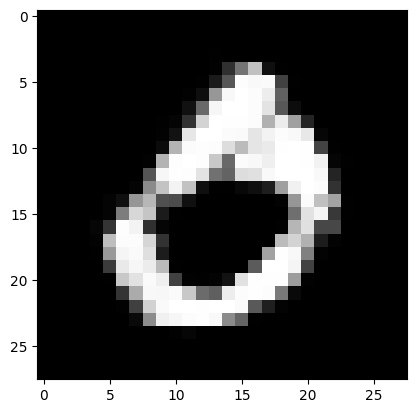

Epoch        100 D-cost -2.4193 G-cost 1.5796


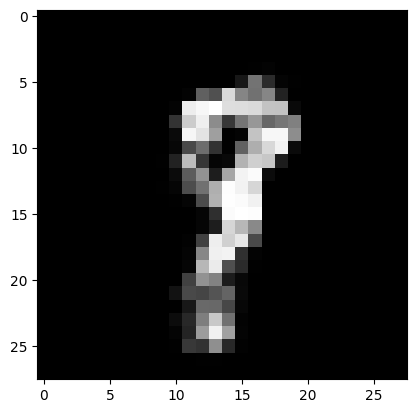

Epoch        110 D-cost -2.3229 G-cost 1.6387


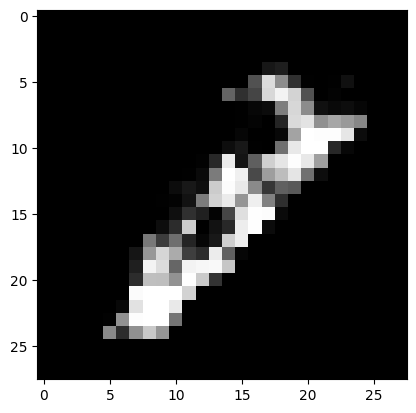

Epoch        120 D-cost -2.2407 G-cost 1.7898


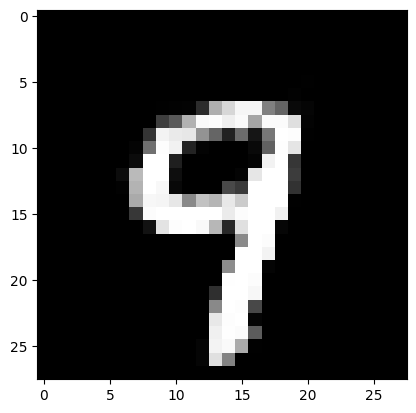

Epoch        130 D-cost -2.1732 G-cost 1.9698


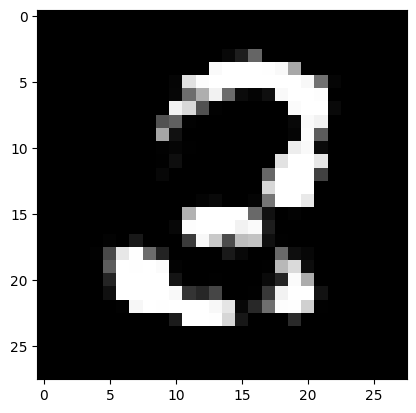

Epoch        140 D-cost -2.1128 G-cost 2.0057


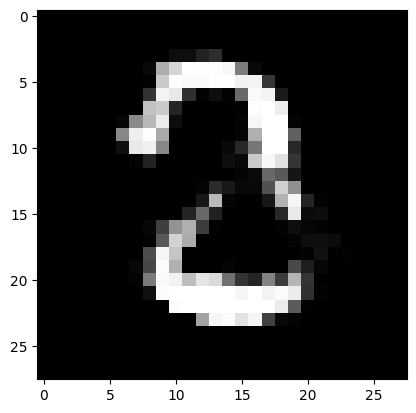

Epoch        150 D-cost -2.0533 G-cost 2.1303


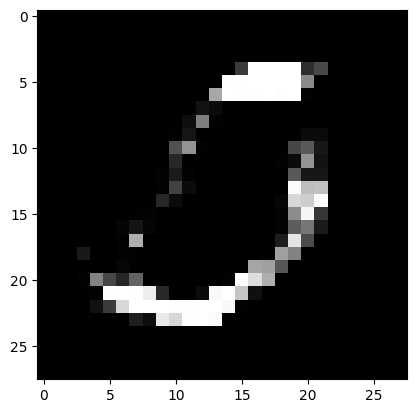

Epoch        160 D-cost -2.0143 G-cost 2.3226


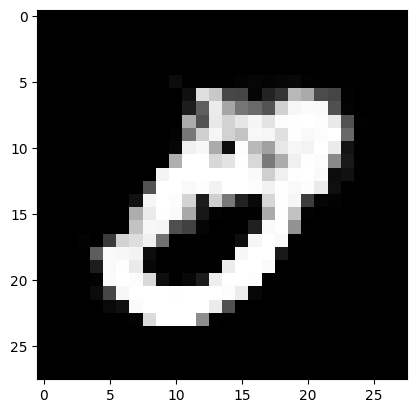

Epoch        170 D-cost -1.9826 G-cost 2.3462


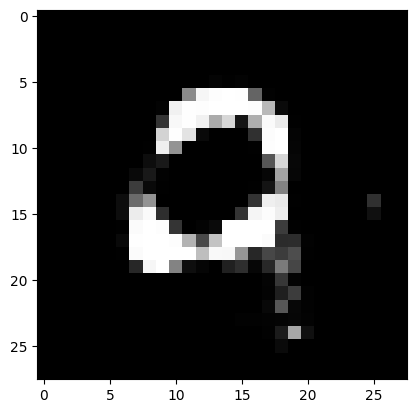

Epoch        180 D-cost -1.9481 G-cost 2.3309


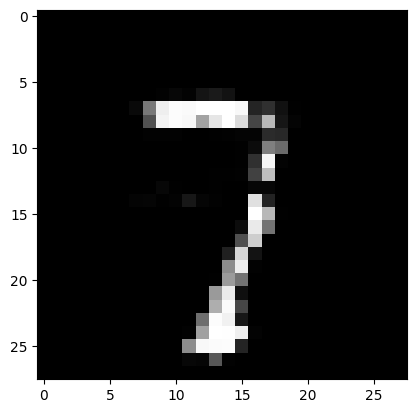

Epoch        190 D-cost -1.9138 G-cost 2.3865


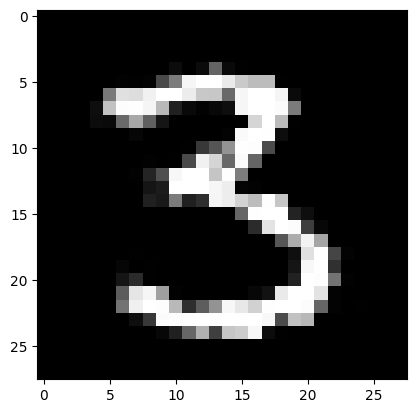

Epoch        200 D-cost -1.8777 G-cost 2.3763


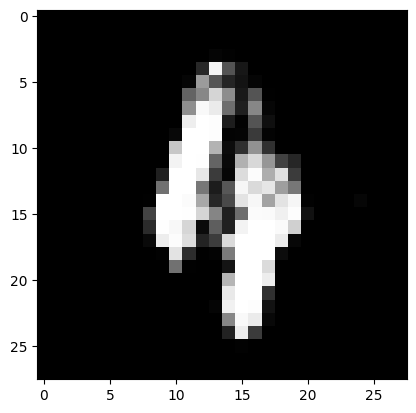

Epoch        210 D-cost -1.8461 G-cost 2.4254


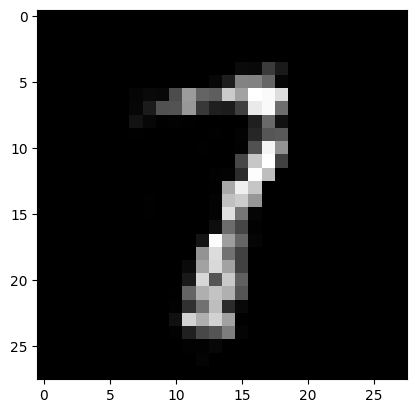

Epoch        220 D-cost -1.8182 G-cost 2.3314


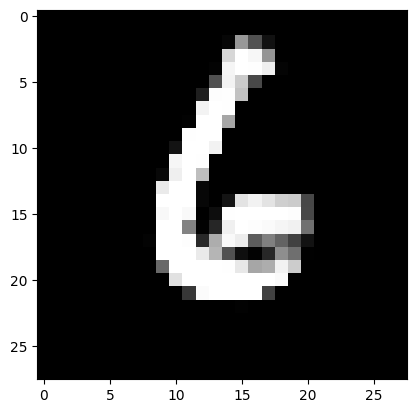

Epoch        230 D-cost -1.7872 G-cost 2.3346


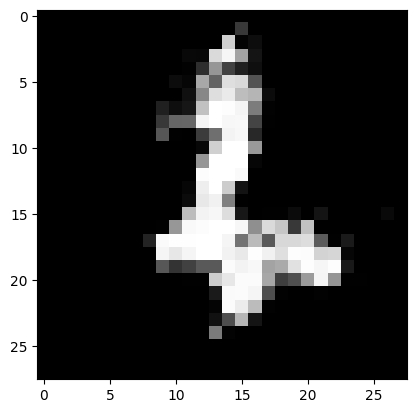

Epoch        240 D-cost -1.7652 G-cost 2.2728


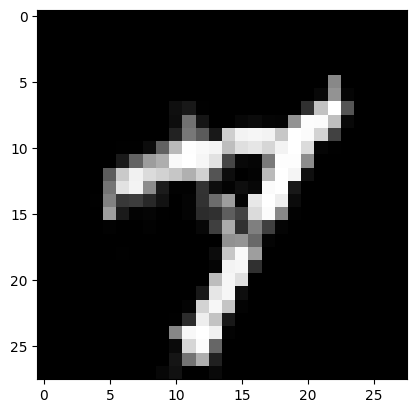

Epoch        250 D-cost -1.7384 G-cost 2.1084


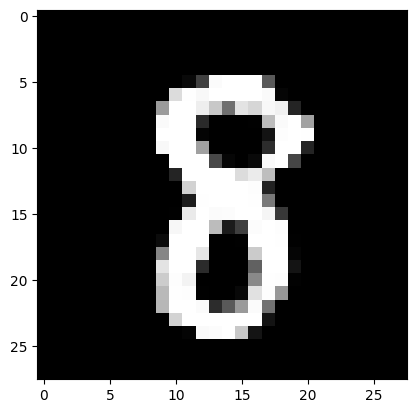

Epoch        260 D-cost -1.7132 G-cost 2.1712


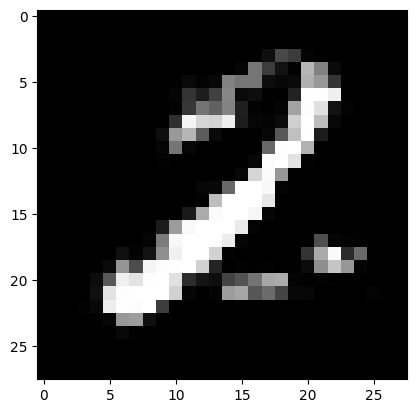

Epoch        270 D-cost -1.6823 G-cost 2.0801


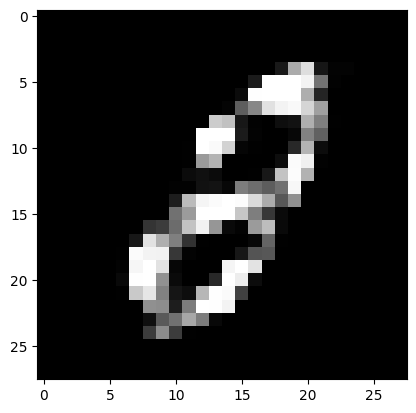

Epoch        280 D-cost -1.6654 G-cost 2.3210


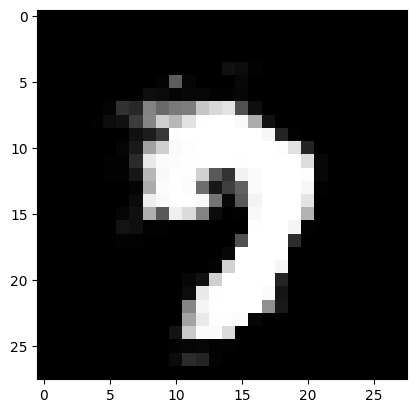

Epoch        290 D-cost -1.6454 G-cost 2.3634


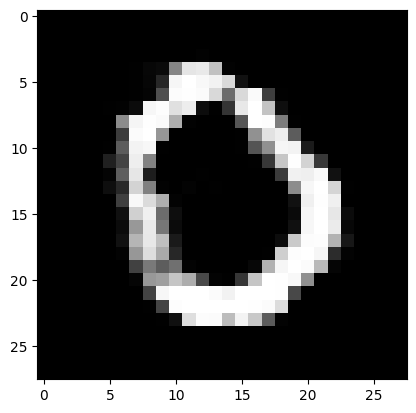

Epoch        300 D-cost -1.6256 G-cost 2.4816


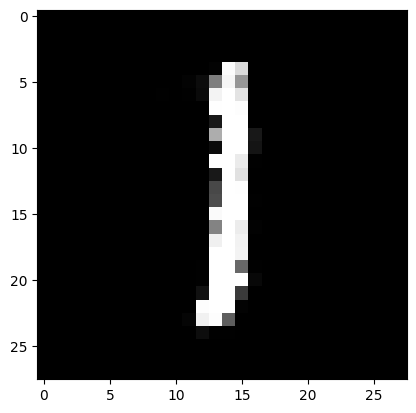

In [2]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(0)
np.random.seed(0)

def main():
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 300
    CriticLearningNumber = 5
    GradientPenaltyCoefficient = 10

    # データセットの読み込み
    (learnX, learnT), (_, _) = tf.keras.datasets.mnist.load_data()
    learnX = np.asarray(learnX.reshape([60000, 784]), dtype="float32")
    learnX = (learnX - 127.5) / 127.5

    # 生成器と識別器の構築
    generator = Generator() # 下のクラスを参照．
    critic = Critic() # 下のクラスを参照．

    # オプティマイザは生成器と識別器で同じで良い．が，ハイパーパラメータを変えたくなるかもしれないからふたつ用意．
    optimizerGenerator = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)
    optimizerCritic = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)

    @tf.function()
    def runCritic(generator, critic, noiseVector, realInputVector):
        with tf.GradientTape() as criticTape:
            generatedInputVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector) # その生成データを識別器に入れる．
            criticOutputFromReal = critic(realInputVector) # 本物データを識別器に入れる．
            epsilon = tf.random.uniform(generatedInputVector.shape, minval=0, maxval=1)
            intermediateVector = generatedInputVector + epsilon * (realInputVector - generatedInputVector)
            # 勾配ペナルティ
            with tf.GradientTape() as gradientPenaltyTape:
                gradientPenaltyTape.watch(intermediateVector)
                criticOutputFromIntermediate = critic(intermediateVector)
                gradientVector = gradientPenaltyTape.gradient(criticOutputFromIntermediate, intermediateVector)
                gradientNorm = tf.norm(gradientVector, ord="euclidean", axis=1) # gradientNorm = tf.sqrt(tf.reduce_sum(tf.square(gradientVector), axis=1)) と書いても良い．
                gradientPenalty = GradientPenaltyCoefficient * (gradientNorm - 1)**2
            # 識別器の成長
            criticCost = tf.reduce_mean(criticOutputFromGenerated - criticOutputFromReal + gradientPenalty) # 識別器を成長させるためのコストを計算．WGANの元論文の式そのまま．
            gradientCritic = criticTape.gradient(criticCost, critic.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerCritic.apply_gradients(zip(gradientCritic, critic.trainable_variables))
            return criticCost

    @tf.function()
    def runGenerator(generator, critic, noiseVector):
        with tf.GradientTape() as generatorTape:
            generatedInputVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector) # その生成データを識別器に入れる．
            # 生成器の成長
            generatorCost = -tf.reduce_mean(criticOutputFromGenerated) # 生成器を成長させるためのコストを計算．
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return generatorCost

    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # 今回はインプットデータしか使わないけど後にターゲットデータを使う場合があるため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        criticCost, generatorCost = 0, 0
        for learnx, _ in learnA:
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(CriticLearningNumber):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                criticCostPiece = runCritic(generator, critic, noiseVector, learnx)
                criticCost += criticCostPiece / (CriticLearningNumber * miniBatchNumber)
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(1):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                generatorCostPiece = runGenerator(generator, critic, noiseVector)
                generatorCost += generatorCostPiece / miniBatchNumber
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} G-cost {:6.4f}".format(epoch,float(criticCost),float(generatorCost)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationOutput = generator(validationNoiseVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.pause(1)

# 入力されたデータを評価するネットワーク
class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=1)
        self.a = tf.keras.layers.LeakyReLU()
        self.dropout = tf.keras.layers.Dropout(0.5)
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d4(y)
        return y

# 入力されたベクトルから別のベクトルを生成するネットワーク
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator,self).__init__()
        self.d1=tf.keras.layers.Dense(units=128)
        self.d2=tf.keras.layers.Dense(units=128)
        self.d3=tf.keras.layers.Dense(units=128)
        self.d4=tf.keras.layers.Dense(units=784)
        self.a=tf.keras.layers.LeakyReLU()
        self.b1=tf.keras.layers.BatchNormalization()
        self.b2=tf.keras.layers.BatchNormalization()
        self.b3=tf.keras.layers.BatchNormalization()
    def call(self,x):
        y = self.d1(x)
        y = self.a(y)
        y = self.b1(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.b2(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.b3(y)
        y = self.d4(y)
        y = tf.keras.activations.tanh(y)
        return y

def generateNoise(miniBatchSize, randomNoiseSize):
    return np.random.uniform(-1, 1, size=(miniBatchSize,randomNoiseSize)).astype("float32")

if __name__ == "__main__":
    main()

このプログラムを実行すると，上の基本的な GAN を用いたときよりも奇麗な画像が出力されたのではないかと思います．また，生成器が綺麗な画像を出力しだす実時間も基本的な GAN を用いた場合よりも早かったのではないでしょうか．

```{note}
WGAN-gp が優れた方法であることがわかりますね．
```

以下の部分はハイパーパラメータの設定部分ですが，基本的な GAN と比べて，`CriticLearningNumber` が新たに加わっています．これは，生成器のパラメータ更新 1 回に対してクリティックのパラメータ更新をさせる回数です．基本的な GAN の学習をうまく進めるために生成器の学習回数を増やすことがあるのですが，WGAN-gp ではクリティックの方の学習回数を増やします．また，`GradientPenaltyCoefficient` は勾配ペナルティに欠ける係数です．これはハイパーパラメータなのですが，元の論文では 10 に設定されていたため，ここでも 10 にしました．

```python
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 300
    CriticLearningNumber = 5
    GradientPenaltyCoefficient = 10
```

WGAN-gp では生成器とクリティックの学習回数を変えるため，パラメータ更新のための関数は別々に用意する必要があります．以下はクリティックのパラメータ更新を行うための記述です．

```python
    @tf.function()
    def runCritic(generator, critic, noiseVector, realInputVector):
        with tf.GradientTape() as criticTape:
            generatedInputVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector) # その生成データを識別器に入れる．
            criticOutputFromReal = critic(realInputVector) # 本物データを識別器に入れる．
            epsilon = tf.random.uniform(generatedInputVector.shape, minval=0, maxval=1)
            intermediateVector = generatedInputVector + epsilon * (realInputVector - generatedInputVector)
            # 勾配ペナルティ
            with tf.GradientTape() as gradientPenaltyTape:
                gradientPenaltyTape.watch(intermediateVector)
                criticOutputFromIntermediate = critic(intermediateVector)
                gradientVector = gradientPenaltyTape.gradient(criticOutputFromIntermediate, intermediateVector)
                gradientNorm = tf.norm(gradientVector, ord="euclidean", axis=1) # gradientNorm = tf.sqrt(tf.reduce_sum(tf.square(gradientVector), axis=1)) と書いても良い．
                gradientPenalty = GradientPenaltyCoefficient * (gradientNorm - 1)**2
            # 識別器の成長
            criticCost = tf.reduce_mean(criticOutputFromGenerated - criticOutputFromReal + gradientPenalty) # 識別器を成長させるためのコストを計算．WGANの元論文の式そのまま．
            gradientCritic = criticTape.gradient(criticCost, critic.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerCritic.apply_gradients(zip(gradientCritic, critic.trainable_variables))
            return criticCost
```

上で紹介したクリティックのコストを計算するための記述が含まれています．上の式の $\epsilon$ は `epsilon` からはじまる行で生成されます．単に一様分布からのサンプリングです．`intermediateVector` は $\hat{x}$ です．さらに，クリティックの出力に対してこの $\hat{x}$ に対する勾配を計算する必要がありますが，それを行っているのが `gradientVector` の行の記述です．引き続き `gradientPenalty` を行っています．その下の `criticCost` からはじまる行はクリティックのコストを求める上の式そのものです．

以下の記述は生成器のコストを求めるためのものです．`generatorCost` からはじまる行が生成器を求めるための上の式そのものなので理解しやすいのではないでしょうか．

```python
    @tf.function()
    def runGenerator(generator, critic, noiseVector):
        with tf.GradientTape() as generatorTape:
            generatedInputVector = generator(noiseVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector) # その生成データを識別器に入れる．
            # 生成器の成長
            generatorCost = -tf.reduce_mean(criticOutputFromGenerated) # 生成器を成長させるためのコストを計算．
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return generatorCost
```

学習ループの部分は基本的な GAN のものとほぼ同じなのですが，識別器のパラメータ更新の回数を生成器のそれと変えるため，`for _ in range(CriticLearningNumber):` の部分でハイパーパラメータとして設定した分だけパラメータ更新のループを設定しています．

```python
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        criticCost, generatorCost = 0, 0
        for learnx, _ in learnA:
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(CriticLearningNumber):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                criticCostPiece = runCritic(generator, critic, noiseVector, learnx)
                criticCost += criticCostPiece / (CriticLearningNumber * miniBatchNumber)
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(1):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                generatorCostPiece = runGenerator(generator, critic, noiseVector)
                generatorCost += generatorCostPiece / miniBatchNumber
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} G-cost {:6.4f}".format(epoch,float(criticCost),float(generatorCost)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationOutput = generator(validationNoiseVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.pause(1)
```

## CGAN

この節では条件を指定することで条件に合ったデータを生成することができる GAN の改良版である CGAN の実装方法を紹介します．

### CGAN とは

GAN のプログラムで確認したように，0から9までの手書き数字の文字が含まれた画像を入力データとして学習させた学習済みのGANの生成器は，ランダムに生成されたノイズを入力データとして，ランダムに0から9までの数字が描かれた画像を生成することができます．生成される数字はノイズに応じたランダムなものであり，特定の数字が描かれた画像を意図的に出力させることはできません．これに対して，CGAN は生成器への入力データとしてノイズに加えて，何らかの条件を入力情報として与えることができる方法です．この条件を例えば0から9までの数字として設定して学習すれば，学習済みの生成器に特定の数字を条件として入力することで特定の数字を含む画像だけを生成させることができます．CGAN の全体像は以下の図に示す通りです．ほぼ GAN と同様なのですが，条件データを生成器と識別器に入れることができます．

<img src="https://github.com/yamada-kd/introduction-to-artificial-intelligence/blob/main/image/cgan.svg?raw=1" width="100%" />

基本的な GAN は新たなデータを生成することが可能でしたが，CGANを利用すれば，データの変換を行うことができます．例えば，人の顔画像を出力すように学習させた生成器に「笑う」，「怒る」，「悲しむ」のような条件を同時に与えることで画像中の人の表情を変化させることができます．また，風景画を出力するように学習させた生成器に「歌川広重」，「フェルメール」，「レンブラント」等のような画家（転じて画風）の条件を与えることで，指定した画家が描いたような風景画を出力させることができます．


```{note}
上手に使えば色々なことを実現できます．
```

### CGAN の実装

CGAN を実装します．ただし，この CGAN では基本的な GAN の学習法ではなくて WGAN-gp の方法を使っています．WGAN-gp が非常に強力な方法だからです．よって，これは元々の CGAN でなくて CWGAN-gp とでも呼ぶべきものです．このプログラムでも MNIST の学習データセットを読み込んで，類似した数字画像を出力する人工知能を構築します．以下のように書きます．

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(0)
np.random.seed(0)

def main():
    # ハイパーパラメータの設定
    MiniBatchSize = 300
    NoiseSize = 100 # GANはランダムなノイズベクトルから何かを生成する方法なので，そのノイズベクトルのサイズを設定する．
    MaxEpoch = 300
    CriticLearningNumber = 5
    GradientPenaltyCoefficient = 10

    # データセットの読み込み
    (learnX, learnT), (_, _) = tf.keras.datasets.mnist.load_data()
    learnX = np.asarray(learnX.reshape([60000, 784]), dtype="float32")
    learnX = (learnX - 127.5) / 127.5

    # 生成器と識別器の構築
    generator = Generator() # 下のクラスを参照．
    critic = Critic() # 下のクラスを参照．

    # オプティマイザは生成器と識別器で同じで良い．が，ハイパーパラメータを変えたくなるかもしれないからふたつ用意．
    optimizerGenerator = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)
    optimizerCritic = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0,beta_2=0.9)

    @tf.function()
    def runCritic(generator, critic, noiseVector, realInputVector, realConditionVector):
        with tf.GradientTape() as criticTape:
            generatedInputVector = generator(noiseVector, realConditionVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector, realConditionVector) # その生成データを識別器に入れる．
            criticOutputFromReal = critic(realInputVector, realConditionVector) # 本物データを識別器に入れる．
            epsilon = tf.random.uniform(generatedInputVector.shape, minval=0, maxval=1)
            intermediateVector = generatedInputVector + epsilon * (realInputVector - generatedInputVector)
            # 勾配ペナルティ
            with tf.GradientTape() as gradientPenaltyTape:
                gradientPenaltyTape.watch(intermediateVector)
                criticOutputFromIntermediate = critic(intermediateVector, realConditionVector)
                gradientVector = gradientPenaltyTape.gradient(criticOutputFromIntermediate, intermediateVector)
                gradientNorm = tf.norm(gradientVector, ord="euclidean", axis=1) # gradientNorm = tf.sqrt(tf.reduce_sum(tf.square(gradientVector), axis=1)) と書いても良い．
                gradientPenalty = GradientPenaltyCoefficient * (gradientNorm - 1)**2
            # 識別器の成長
            criticCost = tf.reduce_mean(criticOutputFromGenerated - criticOutputFromReal + gradientPenalty) # 識別器を成長させるためのコストを計算．WGANの元論文の式そのまま．
            gradientCritic = criticTape.gradient(criticCost, critic.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerCritic.apply_gradients(zip(gradientCritic, critic.trainable_variables))
            return criticCost

    @tf.function()
    def runGenerator(generator, critic, noiseVector, generatedConditionVector):
        with tf.GradientTape() as generatorTape:
            generatedInputVector = generator(noiseVector, generatedConditionVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector, generatedConditionVector) # その生成データを識別器に入れる．
            # 生成器の成長
            generatorCost = -tf.reduce_mean(criticOutputFromGenerated) # 生成器を成長させるためのコストを計算．
            gradientGenerator = generatorTape.gradient(generatorCost,generator.trainable_variables) # 生成器のパラメータで勾配を計算．
            optimizerGenerator.apply_gradients(zip(gradientGenerator,generator.trainable_variables))
            return generatorCost

    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # インプットデータもターゲットデータも両方使うため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
    # 学習ループ
    for epoch in range(1,MaxEpoch+1):
        criticCost, generatorCost = 0, 0
        for learnx, learnt in learnA:
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(CriticLearningNumber):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                criticCostPiece = runCritic(generator, critic, noiseVector, learnx, learnt)
                criticCost += criticCostPiece / (CriticLearningNumber * miniBatchNumber)
            # WGAN-gpでは識別器1回に対して生成器を複数回学習させるのでそのためのループ．
            for _ in range(1):
                noiseVector = generateNoise(MiniBatchSize, NoiseSize) # ミニバッチサイズで100個の要素からなるノイズベクトルを生成．
                generatedConditionVector = generateConditionVector(MiniBatchSize)
                generatorCostPiece = runGenerator(generator, critic, noiseVector, generatedConditionVector)
                generatorCost += generatorCostPiece / miniBatchNumber
        # 疑似的なテスト
        if epoch%10 == 0:
            print("Epoch {:10d} D-cost {:6.4f} G-cost {:6.4f}".format(epoch,float(criticCost),float(generatorCost)))
            validationNoiseVector = generateNoise(1, NoiseSize)
            validationConditionVector = generateConditionVector(1)
            validationOutput = generator(validationNoiseVector, validationConditionVector)
            validationOutput = np.asarray(validationOutput).reshape([1, 28, 28])
            plt.imshow(validationOutput[0], cmap = "gray")
            plt.text(1, 2.5, int(validationConditionVector[0]), fontsize=20, color="white")
            plt.pause(1)

# 入力されたデータを評価するネットワーク
class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=1)
        self.a = tf.keras.layers.LeakyReLU()
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.embed = tf.keras.layers.Embedding(input_dim=10, output_dim=64, mask_zero=False)
        self.concatenate = tf.keras.layers.Concatenate()
    def call(self,x,c):
        y = self.d1(x)
        c = self.embed(c)
        y = self.concatenate([y, c])
        y = self.a(y)
        y = self.dropout(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.dropout(y)
        y = self.d4(y)
        return y

# 入力されたベクトルから別のベクトルを生成するネットワーク
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator,self).__init__()
        self.d1 = tf.keras.layers.Dense(units=128)
        self.d2 = tf.keras.layers.Dense(units=128)
        self.d3 = tf.keras.layers.Dense(units=128)
        self.d4 = tf.keras.layers.Dense(units=784)
        self.a = tf.keras.layers.LeakyReLU()
        self.b1 = tf.keras.layers.BatchNormalization()
        self.b2 = tf.keras.layers.BatchNormalization()
        self.b3 = tf.keras.layers.BatchNormalization()
        self.embed = tf.keras.layers.Embedding(input_dim=10, output_dim=64, mask_zero=False)
        self.concatenate = tf.keras.layers.Concatenate()
    def call(self,x,c):
        y = self.d1(x)
        c = self.embed(c)
        y = self.concatenate([y, c])
        y = self.a(y)
        y = self.b1(y)
        y = self.d2(y)
        y = self.a(y)
        y = self.b2(y)
        y = self.d3(y)
        y = self.a(y)
        y = self.b3(y)
        y = self.d4(y)
        y = tf.keras.activations.tanh(y)
        return y

def generateNoise(miniBatchSize, randomNoiseSize):
    return np.random.uniform(-1, 1, size=(miniBatchSize,randomNoiseSize)).astype("float32")

def generateConditionVector(miniBatchSize):
    return np.random.choice(range(10), size=(miniBatchSize))

if __name__ == "__main__":
    main()

実行した結果として生成される画像の中心から左上の辺りに数字が表示されていると思います．これはランダムに発生させた条件です．ランダムに 0 から 9 の範囲内にある整数が選択されます．この整数で指定した条件と同じような手書き数字（のようなもの）を出力してほしいのですが，結果を確認すると意図通りにできていますよね．

CGAN の説明はこれまでのプログラムが理解できている人には不要かもしれません．WGAN-gp の実装変わっている点は 1 点だけです．以下はクリティックのコストを求めるための記述ですが，引数がひとつ増えています．`realConditionVector` が増えているのですが，これは条件を指定するためのベクトルです．生成器とクリティックの入力ベクトルとして条件データを入力する必要があるため，これが新たに加わっただけです．その他の計算は WGAN-gp のものと全く同じです．

```python
    @tf.function()
    def runCritic(generator, critic, noiseVector, realInputVector, realConditionVector):
        with tf.GradientTape() as criticTape:
            generatedInputVector = generator(noiseVector, realConditionVector) # 生成器によるデータの生成．
            criticOutputFromGenerated = critic(generatedInputVector, realConditionVector) # その生成データを識別器に入れる．
            criticOutputFromReal = critic(realInputVector, realConditionVector) # 本物データを識別器に入れる．
            epsilon = tf.random.uniform(generatedInputVector.shape, minval=0, maxval=1)
            intermediateVector = generatedInputVector + epsilon * (realInputVector - generatedInputVector)
            # 勾配ペナルティ
            with tf.GradientTape() as gradientPenaltyTape:
                gradientPenaltyTape.watch(intermediateVector)
                criticOutputFromIntermediate = critic(intermediateVector, realConditionVector)
                gradientVector = gradientPenaltyTape.gradient(criticOutputFromIntermediate, intermediateVector)
                gradientNorm = tf.norm(gradientVector, ord="euclidean", axis=1) # gradientNorm = tf.sqrt(tf.reduce_sum(tf.square(gradientVector), axis=1)) と書いても良い．
                gradientPenalty = GradientPenaltyCoefficient * (gradientNorm - 1)**2
            # 識別器の成長
            criticCost = tf.reduce_mean(criticOutputFromGenerated - criticOutputFromReal + gradientPenalty) # 識別器を成長させるためのコストを計算．WGANの元論文の式そのまま．
            gradientCritic = criticTape.gradient(criticCost, critic.trainable_variables) # 識別器のパラメータだけで勾配を計算．つまり生成器のパラメータは行わない．
            optimizerCritic.apply_gradients(zip(gradientCritic, critic.trainable_variables))
            return criticCost
```

以下のミニバッチを構築するための記述の `learnA` からはじまる行のコメントに注目してください．これまではここに，「今回はインプットデータしか使わないけど後にターゲットデータを使う場合があるため．」と書いていましたが，ここでは，「インプットデータもターゲットデータも両方使うため．」と書きました．CGAN では MNIST の教師データを学習ループ内で使うためです．

```python
    # ミニバッチセットの生成
    learnX = tf.data.Dataset.from_tensor_slices(learnX) # このような方法を使うと簡単にミニバッチを実装することが可能．
    learnT = tf.data.Dataset.from_tensor_slices(learnT)
    learnA = tf.data.Dataset.zip((learnX, learnT)).shuffle(60000).batch(MiniBatchSize) # インプットデータもターゲットデータも両方使うため．
    miniBatchNumber = len(list(learnA.as_numpy_iterator()))
```

```{note}
終わりです．
```